
# OLS

Very simple notebook to get started with python, simulating and estimating. In this homework, we hope to learn

- setup an python environment, see [getting started](http://econ21340.lamadon.com/getting-started/).
- familiarize ourselves with basic [numpy](https://numpy.org/)
- familiarize ourselves with [keras](https://keras.io/)

You can download this notebook <a href="../ols.ipynb" download>here</a> :fontawesome-regular-laugh-wink:

[Submit :fontawesome-download:](#){: .md-button .md-button--primary }

We consider the simple linear model 

$$ y_i = \beta x_i + \epsilon_i $$

In [1]:
%cd ..
%load_ext autoreload
%reload_ext autoreload
import numpy as np

# the following loads my solution file, which you do not have! 
# you should comment the following line, or create your solution in solutions/sol_ols.py
#from solutions.sol_ols import *


/Users


## Simulate data
We start by simulating data of N observations and K regressors. We keep everything normal to keep things simple.

In [2]:
N = 1000
K = 10
X = np.random.normal(size = (N,K))
E = np.random.normal(size = N)
beta = np.linspace(0,1,num=K)

Y = np.matmul(X,beta) + E

As you can see we make extensive use of vector operations from the [numpy](https://numpy.org/) package.

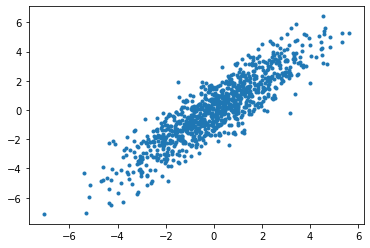

In [3]:
import matplotlib.pyplot as plt
plt.plot(np.matmul(X,beta),Y,'.')
plt.show()

## Solve using numpy and linear algebra

!!! question
    This is the first question. Write your own `numpy_ols` function, which takes as an input `(Y,X)` and returns the OLS estimates. You only need to use two numpy functions `np.transpose`, `np.matmul` and `np.linalg.solve`. The function should just a few lines.
    
We use the created function (in this document it is using the one that I wrote) and we then plot the estimated $\beta$ versus the true $\beta$.    

In [4]:
#Solution to Problem 1 

def numpy_ols(y_vals, x_vals):
    '''
    Defining the numpy OLS function
    Takes an input (Y,X) and returns OLS estimates
    '''
    
    XPrime = np.transpose(x_vals)
    XPrime_X = np.matmul(XPrime, x_vals)
    XPrime_Y = np.matmul(XPrime, y_vals)
    coeff = np.linalg.solve(XPrime_X, XPrime_Y)
    
    return coeff


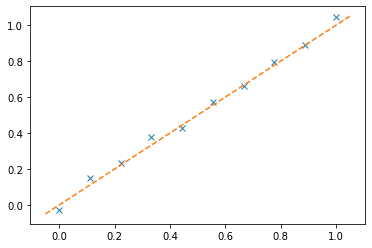

In [5]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

beta_hat = numpy_ols(Y,X)
plt.plot(beta,beta_hat,'x')
abline(1,0)
plt.show()

## Solve using Keras

Now we are going to make an overkill, which is to use [Keras](https://keras.io/) to solve this linear problem. Kera allows to build models by composing layers. For instance, here, imagine I wanted to fit a neural net on the data I have generated, I would do the following:

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

Using TensorFlow backend.


In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(K,)))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


The first layer is a [Dense layer](https://keras.io/layers/core/), and it implements the following transformation:
$$ l_i = \sum_{k=1}^K w_k Z_{ik} $$
for a set of weights $w_k$ that we want to estimate and some input $Z_{ik}$. Later on we will feed `bacthes` from X to this.

Because we are using a `sequential` construction, the second layer takes the output $l_i$ of the first layer and generate an output
$$ \hat{y}_i = g(l_i) $$
for some non linear function refered to as activation functions. 

See this [description of activation functions](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html) including the [one we have specificed](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#sigmoid).

The next command initializes the model, specifies the optimzer to use and specifies the loss function to minimize. Here we will try to minimize the square loss between provided output and model output:

$$ \min_{w_k} \sum_i (\hat{y}_i - y_i)^2 $$

In [8]:
model.compile(optimizer='adam', loss='mse')

It is finally time to feed the data to our model. We specify the input $X$, the output $Y$, the number of passes we want to do on the data `epochs` as well as the size of the batches, meaning the numbers of $i$ observation to give at the same time to compute one update step of the optimizer.

In [9]:
hist = model.fit(X, Y, epochs=100, batch_size=50, verbose=0)

We then extract the estimated weights $w_k$ and compare them to the $\beta$ that generated the data.

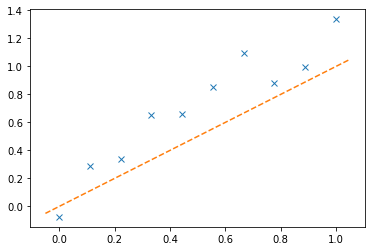

In [10]:
beta_keras = model.layers[0].get_weights()[0]
plt.plot(beta,beta_keras[0:K],'x')
abline(1,0)
plt.show()

!!! question 
    Question 2: Clearly the neural net that we used doesn't deliver the right estimates for $\beta$. The functional form that we specified when creating the model ressembles more a `logit` than a linear model. Given what you know about the shape of the Dense layer and the Sigmoid activation, modify the model in order to have a functional form identical to the linear form. Either replace the `model2 = kera_linear(K)` int he following code or write you own to try to get a good fit.

In [11]:
#Answer to question 2

model2 = Sequential()
model2.add(Dense(1, input_shape=(K,)))
model2.add(Activation('linear'))


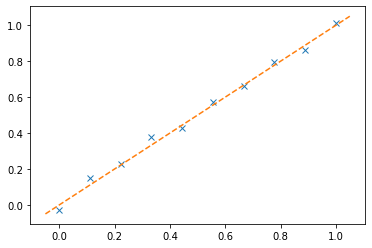

In [12]:
#removed model2 = kera_linear(K), see re-defined model2 above

model2.compile(optimizer='adam', loss='mse')
hist2 = model2.fit(X, Y, epochs=100, batch_size=50, verbose=0);
beta_keras = model2.layers[0].get_weights()[0]
plt.plot(beta,beta_keras[0:K],'x')
abline(1,0)

# Fitting non-linear functions

Let's step it up! Let's try to fit a non linear function of one variable. We are going to use the `cos` function.

In [13]:
X = 10*np.random.uniform(size = N)
Y = np.cos(X) + 0.5*np.random.normal(size = N)

As we can see, this is a function which is neither linear or a simple activation function:

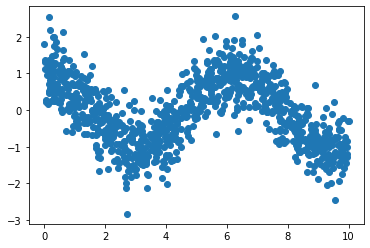

In [14]:
plt.plot(X,Y,'o')
plt.show()

This is where multilayers shine! We create the following model:

In [15]:
model3 = Sequential()
model3.add(Dense(20, input_shape=(1,)))
model3.add(Activation('elu'))
model3.add(Dense(1))
model3.add(Activation('elu'))
model3.add(Dense(1))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                40        
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


!!! question
    Explain in your own words the structure of this neural net! How many input, what are each layers. Next write your own `fit_model3` function which takes X and Y and model3 and fits it. You needs to adapt the few line of codes that we have used in previous sections. You will also need to play a bit with batch sizes and epochs to succeed in achieving a good fit, as in the following figure.

In [16]:
#Solution to Problem 3

'''
The sequential model in keras is a deep learning model with a single input, single output and multiple layers.
This model consists of both dense layers and activation layers. A dense layer is a densly-connected
neural network layer that receives input from the previous layer. An activation layer applies a 
nonlinear transformation to the input data based on the specified activation function 
and thus enables the neurons to learn better function. The output of the activation layer
should have the same input as the layer it transforms. 
In general, dense implements output=activation(dot(input, kernel)bias).
This particular neural net has 5 layers:
The input of the first layer is a one dimensional array (i.e. input shape (None,1)) with 40 parameters and an output that 
has 20 dimensions (i.e. output shape (None, 20)).
The next layer is an activation layer that applies an ELU, or exponential linear unit, to the previous layer. 
The third layer is a dense layer with 21 parameters and an output that has just one dimension (i.e. output shape (None, 1)). 
The fourth layer is an activation layer that applies another ELU to the previous layer. 
Finally, the last (fifth) layer is a dense layer that has 2 parameters and outputs one dimension (i.e. output shape (None, 1)).
Overall, the model has 63 trainable parameters and no non-trainable parameters.
'''

def fit_model3(model3, X, Y):
    
    model3.compile(optimizer='adam', loss='mse')
    hist3 = model3.fit(X, Y, epochs=10000, batch_size=50, verbose=0);
    
    return None

fit_model3(model3,X,Y)

/Applications/anaconda3/envs/econ21340-env/lib/python3.7/site-packages/keras/callbacks/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.112024). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


We then construct the predition from the model and plot it on top of the data! Voila!

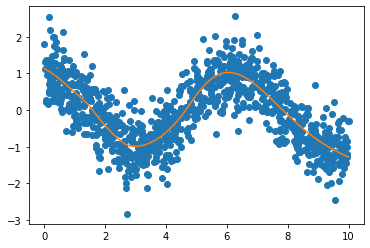

In [17]:
Xp = np.linspace(0,10,num=50)
Yp = model3.predict(Xp)
plt.plot(X,Y,'o')
plt.plot(Xp,Yp,'-')
plt.show()